In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from glob import glob
import random
import cv2
import json
import os
import shutil

from webbox.generate_links import generate_wiki_links
from webbox.webbox import WebBoxGenerator

/home/nazarii/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# GENERATE LINKS

In [55]:
links = generate_wiki_links(100, 'Интернет')

In [56]:
links

['https://ru.wikipedia.org/wiki/Folding@home',
 'https://ru.wikipedia.org/wiki/Microsoft_Academic',
 'https://ru.wikipedia.org/wiki/1_%D1%8F%D0%BD%D0%B2%D0%B0%D1%80%D1%8F',
 'https://ru.wikipedia.org/wiki/World_Community_Grid',
 'https://ru.wikipedia.org/wiki/2_%D1%81%D0%B5%D0%BD%D1%82%D1%8F%D0%B1%D1%80%D1%8F',
 'https://ru.wikipedia.org/wiki/22_%D1%8F%D0%BD%D0%B2%D0%B0%D1%80%D1%8F',
 'https://ru.wikipedia.org/wiki/Safari',
 'https://ru.wikipedia.org/wiki/TLS',
 'https://ru.wikipedia.org/wiki/2010_%D0%B3%D0%BE%D0%B4',
 'https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%BA%D1%81%D0%B8-%D1%81%D0%B5%D1%80%D0%B2%D0%B5%D1%80',
 'https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D1%8D%D0%BD%D1%84%D0%BE%D1%80%D0%B4%D1%81%D0%BA%D0%B8%D0%B9_%D1%83%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82',
 'https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%BC%D0%BE%D1%82%D0%B0.%D1%80%D1%83',
 'https://ru.wikipedia.org/wiki/RSS-%D0%B0%D0%B3%D1%80%D0%B5%D0%B3%D0%B0%D1%82%D0%BE%D1%80',
 'https://r

limit_output extension: Maximum message size of 10000 exceeded with 10221 characters

# GENERATE DATASET

In [93]:
shutil.rmtree('../dataset/', ignore_errors=True)

wbx = WebBoxGenerator(path='../', links=links, sleep_time=0.2)

try:
    wbx.generate_dataset(thresh=1, ksize=(3,3))
finally:
    del wbx

Screenshots in ../dataset/screenshots
Annotations in ../dataset/annotations


KeyboardInterrupt: 

# RESULT

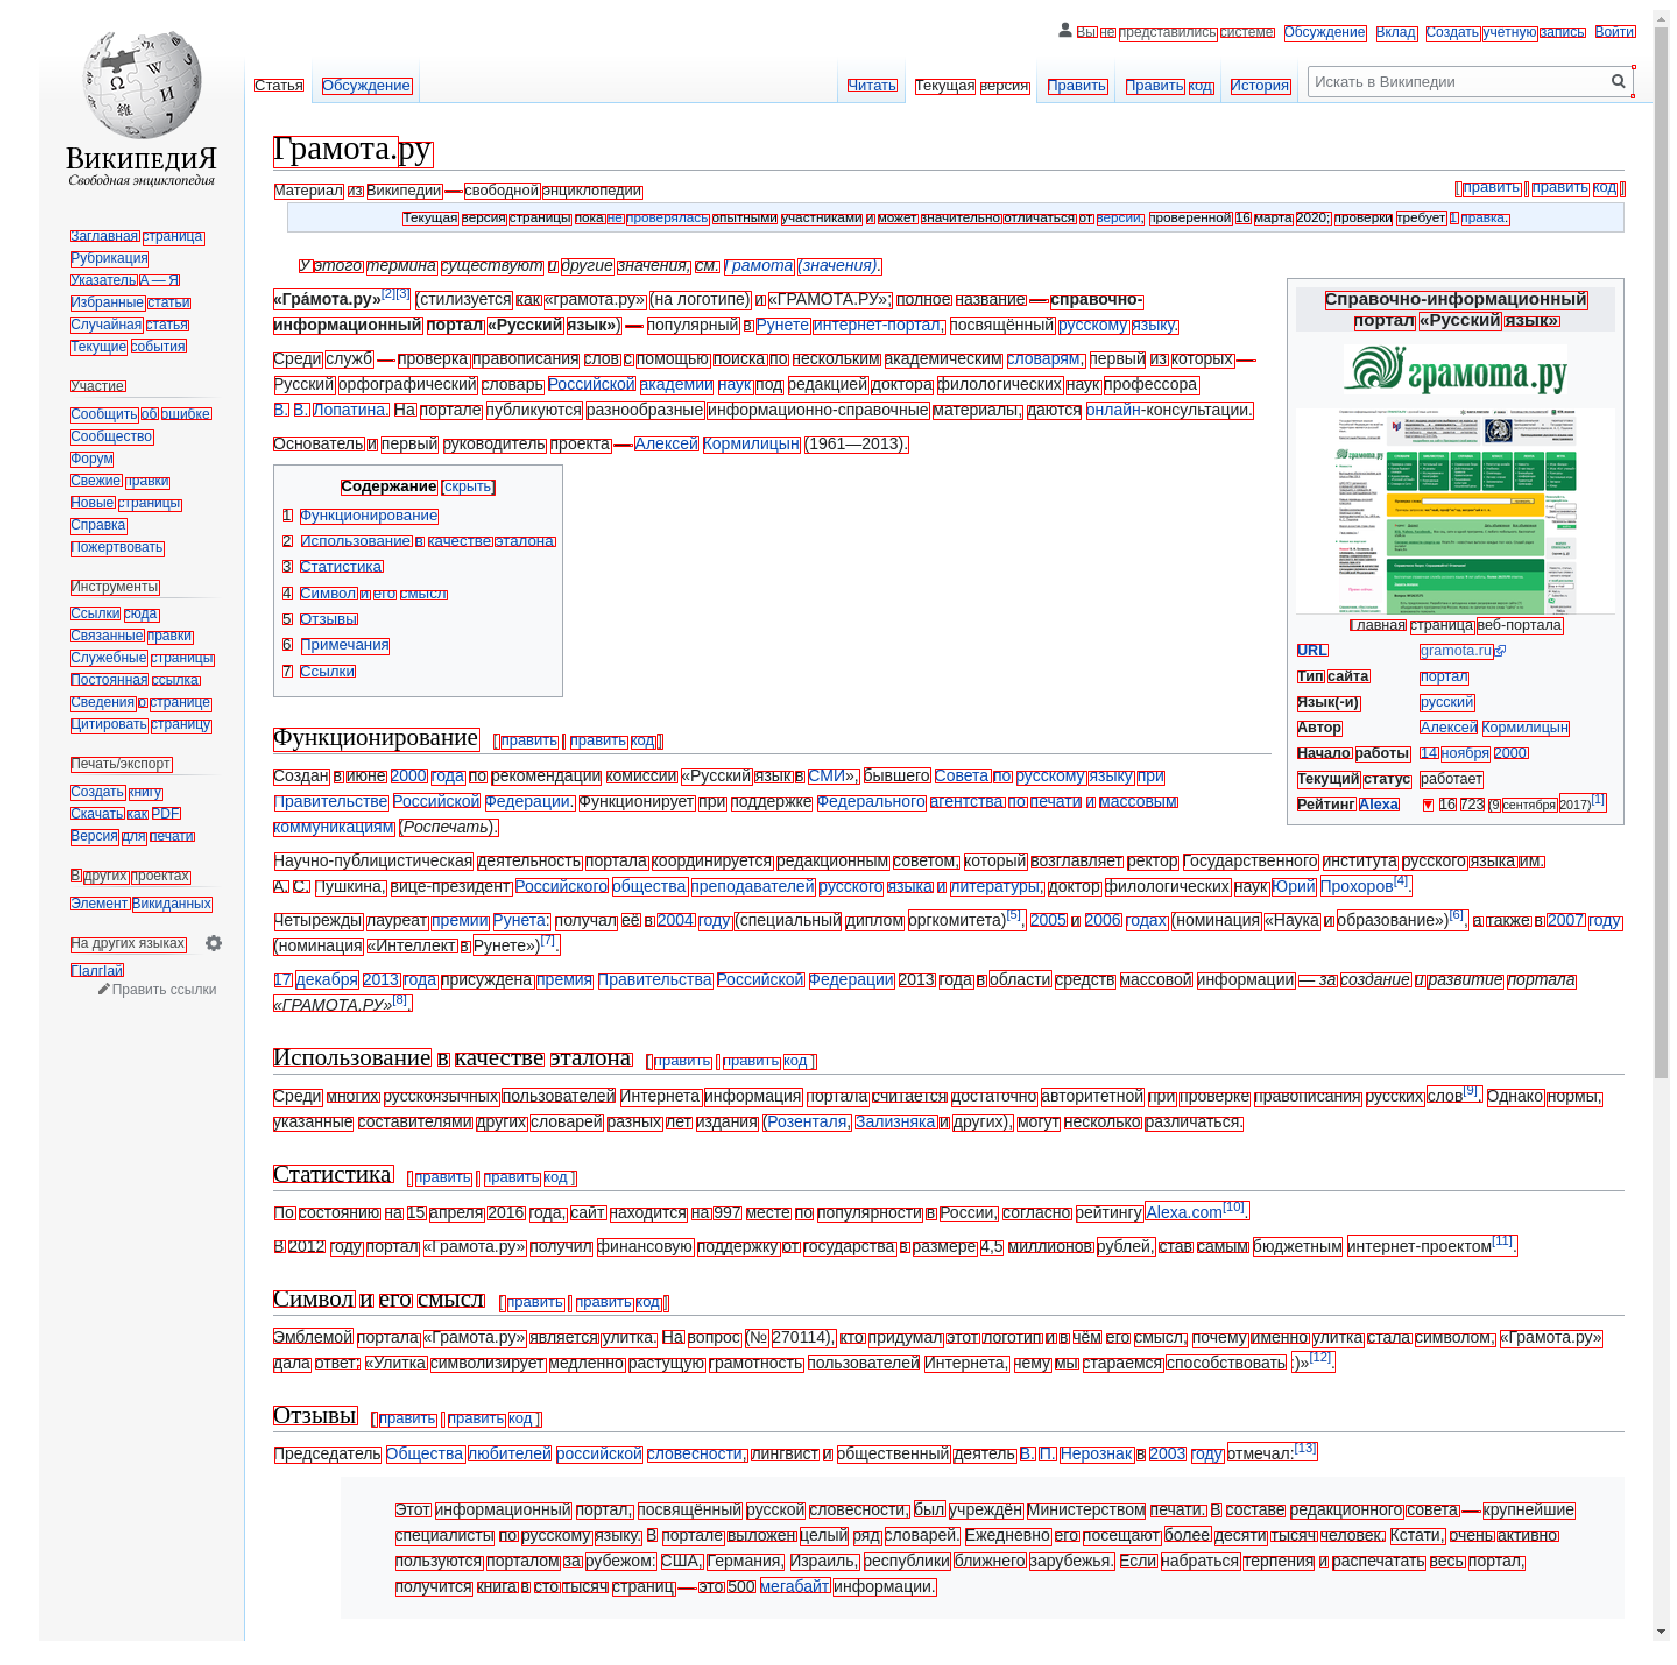

In [98]:
images = [img.split('/')[-1] for img in glob('../dataset/screenshots/*.png')]
title = random.choice(images).split('.')[0]

orig_img = cv2.cvtColor(cv2.imread('../dataset/screenshots/'+title+'.png'), cv2.COLOR_BGR2RGB)
bboxes = np.asarray(list(json.load(open('../dataset/annotations/'+title+'.json', 'r')).values()))

fig, ax = plt.subplots(1, figsize=(60,30))
ax.imshow(orig_img)

for pol in bboxes:
    rec = Rectangle(pol[[0,1]], *(pol[[2,3]] - pol[[0,1]]), 
                    linewidth=1, 
                    edgecolor='r', 
                    facecolor='none')
    ax.add_patch(rec,)

# S = np.prod(bboxes[:,[2,3]] - bboxes[:,[0,1]], axis=1)
# print(S.max(), S.mean(), np.median(S))
    
plt.axis('off')
plt.show()

In [109]:
json.load(open('../dataset/annotations/'+title+'.json', 'r'))

{'box_0': [547.0, 1353.0, 563.0, 1355.0],
 'box_1': [565.0, 1349.0, 587.0, 1358.0],
 'box_2': [491.0, 1349.0, 545.0, 1361.0],
 'box_3': [448.0, 1349.0, 488.0, 1358.0],
 'box_4': [424.0, 1349.0, 446.0, 1358.0],
 'box_5': [413.0, 1349.0, 421.0, 1358.0],
 'box_6': [375.0, 1349.0, 410.0, 1358.0],
 'box_7': [305.0, 1349.0, 371.0, 1361.0],
 'box_8': [590.0, 1347.0, 614.0, 1358.0],
 'box_9': [681.0, 1346.0, 769.0, 1361.0],
 'box_10': [618.0, 1345.0, 678.0, 1358.0],
 'box_11': [1226.0, 1327.0, 1275.0, 1339.0],
 'box_12': [1193.0, 1327.0, 1223.0, 1336.0],
 'box_13': [1109.0, 1327.0, 1189.0, 1339.0],
 'box_14': [1098.0, 1327.0, 1106.0, 1336.0],
 'box_15': [1033.0, 1327.0, 1094.0, 1339.0],
 'box_16': [449.0, 1327.0, 465.0, 1336.0],
 'box_17': [383.0, 1327.0, 446.0, 1339.0],
 'box_18': [305.0, 1327.0, 380.0, 1339.0],
 'box_19': [927.0, 1325.0, 959.0, 1336.0],
 'box_20': [644.0, 1325.0, 703.0, 1339.0],
 'box_21': [573.0, 1325.0, 639.0, 1339.0],
 'box_22': [533.0, 1325.0, 569.0, 1338.0],
 'box_23': 

limit_output extension: Maximum message size of 10000 exceeded with 24965 characters

In [102]:
a = json.load(open('/home/nazarii/Downloads/dataset/testing_data/annotations/82092117.json', 'r'))

In [114]:
a['form']

[{'box': [61, 127, 143, 211],
  'text': '',
  'label': 'other',
  'words': [{'box': [61, 127, 143, 211], 'text': ''}],
  'linking': [],
  'id': 0},
 {'box': [102, 345, 129, 359],
  'text': 'TO:',
  'label': 'question',
  'words': [{'box': [102, 345, 129, 359], 'text': 'TO:'}],
  'linking': [[1, 14]],
  'id': 1},
 {'box': [102, 406, 147, 423],
  'text': 'DATE:',
  'label': 'question',
  'words': [{'box': [102, 406, 147, 423], 'text': 'DATE:'}],
  'linking': [[2, 27]],
  'id': 2},
 {'box': [461, 440, 475, 455],
  'text': '3',
  'label': 'answer',
  'words': [{'box': [461, 440, 475, 455], 'text': '3'}],
  'linking': [[19, 3]],
  'id': 3},
 {'box': [249, 84, 274, 98],
  'text': 'Fax:',
  'label': 'question',
  'words': [{'box': [249, 84, 274, 98], 'text': 'Fax:'}],
  'linking': [[4, 7]],
  'id': 4},
 {'box': [103, 691, 139, 708],
  'text': 'NOTE:',
  'label': 'question',
  'words': [{'box': [103, 691, 139, 708], 'text': 'NOTE:'}],
  'linking': [[5, 24]],
  'id': 5},
 {'box': [633, 775, 653

limit_output extension: Maximum message size of 10000 exceeded with 15953 characters

In [110]:
a['form'][10]

{'text': 'Attorney General Betty D. Montgomery',
 'box': [147, 148, 305, 191],
 'linking': [],
 'label': 'header',
 'words': [{'text': 'Attorney', 'box': [147, 148, 213, 168]},
  {'text': 'General', 'box': [216, 151, 275, 168]},
  {'text': 'Betty', 'box': [148, 172, 187, 190]},
  {'text': 'D.', 'box': [191, 169, 206, 187]},
  {'text': 'Montgomery', 'box': [211, 170, 305, 191]}],
 'id': 10}

In [106]:
a.keys()

dict_keys(['form'])